In [143]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [88]:
cwd = os.getcwd()  
df = pd.read_csv(cwd+'/shot_logs.csv')

In [89]:
df.columns

Index(['GAME_ID', 'MATCHUP', 'LOCATION', 'W', 'FINAL_MARGIN', 'SHOT_NUMBER', 'PERIOD', 'GAME_CLOCK', 'SHOT_CLOCK', 'DRIBBLES', 'TOUCH_TIME', 'SHOT_DIST', 'PTS_TYPE', 'SHOT_RESULT', 'CLOSEST_DEFENDER', 'CLOSEST_DEFENDER_PLAYER_ID', 'CLOSE_DEF_DIST', 'FGM', 'PTS', 'player_name', 'player_id'], dtype='object')

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 21 columns):
GAME_ID                       128069 non-null int64
MATCHUP                       128069 non-null object
LOCATION                      128069 non-null object
W                             128069 non-null object
FINAL_MARGIN                  128069 non-null int64
SHOT_NUMBER                   128069 non-null int64
PERIOD                        128069 non-null int64
GAME_CLOCK                    128069 non-null object
SHOT_CLOCK                    122502 non-null float64
DRIBBLES                      128069 non-null int64
TOUCH_TIME                    128069 non-null float64
SHOT_DIST                     128069 non-null float64
PTS_TYPE                      128069 non-null int64
SHOT_RESULT                   128069 non-null object
CLOSEST_DEFENDER              128069 non-null object
CLOSEST_DEFENDER_PLAYER_ID    128069 non-null int64
CLOSE_DEF_DIST                128069 non-null

In [91]:
df.describe()

,GAME_ID,FINAL_MARGIN,SHOT_NUMBER,PERIOD,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,FGM,PTS,player_id
count,1.280690e+05,128069.000000,128069.000000,128069.000000,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069.000000
mean,2.140045e+07,0.208723,6.506899,2.469427,12.453344,2.023355,2.765901,13.571504,2.264670,159038.487284,4.123015,0.452139,0.997314,157238.251247
std,2.578773e+02,13.233267,4.713260,1.139919,5.763265,3.477760,3.043682,8.888964,0.441159,78791.172947,2.756446,0.497706,1.130978,79362.389336
min,2.140000e+07,-53.000000,1.000000,1.000000,0.000000,0.000000,-163.600000,0.000000,2.000000,708.000000,0.000000,0.000000,0.000000,708.000000
25%,2.140023e+07,-8.000000,3.000000,1.000000,8.200000,0.000000,0.900000,4.700000,2.000000,101249.000000,2.300000,0.000000,0.000000,101162.000000
50%,2.140045e+07,1.000000,5.000000,2.000000,12.300000,1.000000,1.600000,13.700000,2.000000,201949.000000,3.700000,0.000000,0.000000,201939.000000
75%,2.140067e+07,9.000000,9.000000,3.000000,16.675000,2.000000,3.700000,22.500000,3.000000,203079.000000,5.300000,1.000000,2.000000,202704.000000
max,2.140091e+07,53.000000,38.000000,7.000000,24.000000,32.000000,24.900000,47.200000,3.000000,530027.000000,53.200000,1.000000,3.000000,204060.000000


### functions for testing hot hand hypothesis

In [92]:
#this is for original hot hand study
#calculates 
def hh_alg(test_pattern,index):
    
    make = 0
    miss = 0
    output_dict = {
        'array': test_pattern,
        'len': len(test_pattern),
        #define hot hand as making a shot after 2 consecutive makes
        'hh' : 0,
        'nhh' : 0,
        #counting pairs of 1s and 0s but must not use unrealized condition sets
        'c_hh' : 0,
        'c_nhh' : 0,
        #finding the test statistic
        'cp_hot': 0,
        'cp_nhot': 0,
        'cp_del': 0,
    }
    
    #count of makes and miss
    for i,r in enumerate(test_pattern):
        if r == 1:
            #checking for pairs of 1s but excluding unrealized condition sets
            if i >= 1:
                if r == test_pattern[i-1] and i != (len(test_pattern)-1):
                    output_dict['c_hh'] += 1
            #if a 1 occurs after a pair of 1s
            if make >= 2:
                output_dict['hh'] += 1
            #if a 0 occurs after a pair of 1s
            elif miss >= 2:
                output_dict['nhh'] += 1
            miss = 0
            make += 1
        else:
            #checking for pairs of 0s
            if i >= 1:
                if r == test_pattern[i-1] and i != (len(test_pattern)-1):
                    output_dict['c_nhh'] += 1
            make = 0
            miss += 1
    #what if no cases of 111 or 001 appear? then we will get a divide by 0 error
    if output_dict['c_hh'] == 0 and output_dict['c_nhh'] == 0:
        output_dict['cp_hot'] = 0
        output_dict['cp_nhot'] = 0
    
    elif output_dict['c_hh'] == 0:
        output_dict['cp_hot'] = 0
        output_dict['cp_nhot'] = output_dict['nhh']/output_dict['c_nhh']
        
    elif output_dict['c_nhh'] == 0:
        output_dict['cp_hot'] = output_dict['hh']/output_dict['c_hh']
        output_dict['cp_nhot'] = 0
        
    else:
        output_dict['cp_hot'] = output_dict['hh']/output_dict['c_hh']
        output_dict['cp_nhot'] = output_dict['nhh']/output_dict['c_nhh']
        
    output_dict['cp_del'] = output_dict['cp_hot'] - output_dict['cp_nhot']
    
    #this 'cp_del' needs to be compared with 10,000 permutations of the original array to find the p value
    #might be a chance to try recursion since the same calculations need to be made to find the cp_del for the permutation string
        
    return output_dict

In [104]:
#make a hot_hand dataframe for a certain player
def hh_df(pdf, num_perm):
    games = pdf['GAME_ID'].unique()
    dlist = []
    for i,game in enumerate(games):
        perm = 0
        test_game = pdf[pdf['GAME_ID'] == game]
        test_pattern = np.array(test_game['FGM'])
        mdict = hh_alg(test_pattern, i)
        #the fraction onf permuted test statistics (pdict['cp_del']) 
        #that exceed the observed test statistic (mdict['cp_del']) is its p-value
        num_exceed = 0
        while perm < num_perm:
            pdict = hh_alg(np.random.permutation(test_pattern), 0)
            if pdict['cp_del'] > mdict['cp_del']:
                num_exceed += 1
            perm += 1
        #a smaller p value corresponds to a stronger evidence of a hot hand
        p_value = num_exceed / num_perm
        mdict['p_value'] = p_value
        dlist.append(mdict)
    
    df = pd.DataFrame(dlist)
    return df
    

### testing hot hand hypothesis on favorite players vs steph curry and klay thompson (general consensus to have a hot hand)



In [105]:
players = ['mike conley', 'goran dragic', 'damian lillard', 'stephen curry', 'klay thompson']
#will need to write functions to make sure games aren't missing for players but for now just using simple filtering
p_dict = {}
for p in players:
    print(p)
    p_df = df[df['player_name'] == p]
    p_dict[p] = hh_df(p_df, 10000)

mike conley
goran dragic
damian lillard
stephen curry
klay thompson


In [118]:
# p_dict

### Box-plot and CDF of a players p-value

In [136]:
p_list = []
p_pval = []
box_df = pd.DataFrame()
for p,df in p_dict.items():
    df['player'] = p
    box_df = box_df.append(df[['player', 'p_value']])


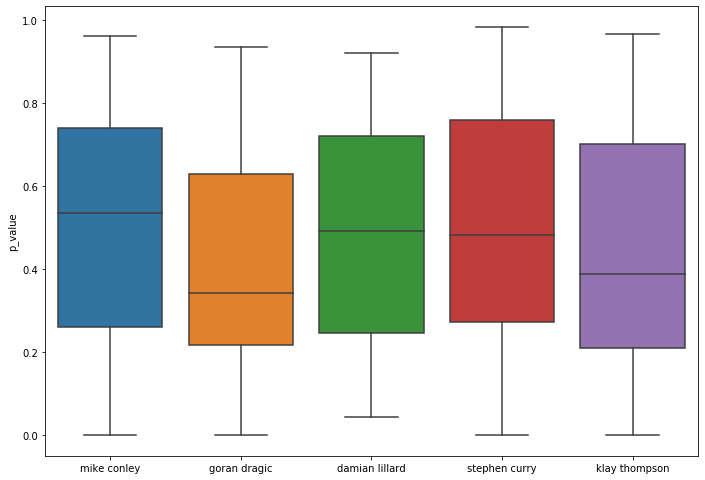

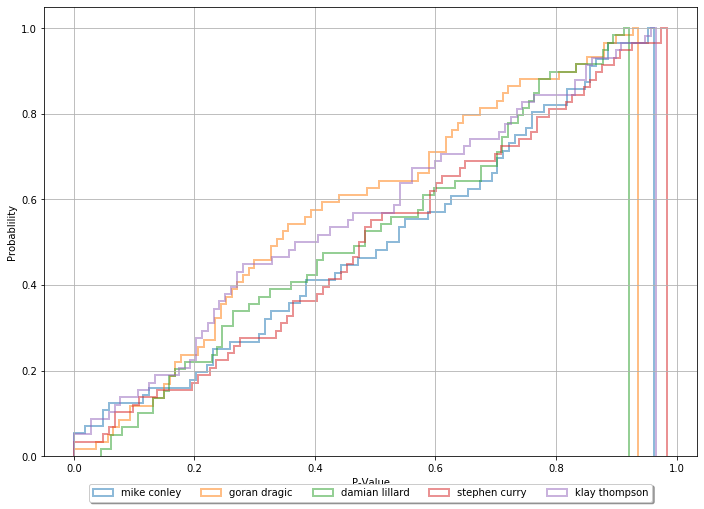

In [202]:
a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(1, figsize=a4_dims)
sns.boxplot(x='player', y='p_value', data=box_df)
ax.set_xlabel('')

fig2,ax2 = plt.subplots(1, figsize=a4_dims)
for p,df in p_dict.items():
    df['p_value'].hist(cumulative=True, density=True, alpha=.5, bins=100, histtype='step', label=p, lw=2)
ax2.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),
          fancybox=True, shadow=True, ncol=5)
ax2.set_xlabel('P-Value')
ax2.set_ylabel('Probablility')
plt.show()